# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [193]:
#Import all the necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [194]:
wine_df = pd.read_csv('winequality-red.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [195]:
wine_df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# Q3 Print the datatypes of each column and the shape of the dataset 

In [196]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [197]:
wine_df.shape

(1599, 12)

In [198]:
#Checking if all columns have a real value
wine_df_real_size = wine_df.applymap(np.isreal)
wine_df_real_size.shape

(1599, 12)

This shows that all values are real

In [199]:
#Let's first remove outliers.
q1 = wine_df.iloc[:,0:11].quantile(0.25)
q3 = wine_df.iloc[:,0:11].quantile(0.75)
print(q1,q3)
IQR = q3-q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR

fixed_acidity           7.1000 
volatile_acidity        0.3900 
citric_acid             0.0900 
residual_sugar          1.9000 
chlorides               0.0700 
free_sulfur_dioxide     7.0000 
total_sulfur_dioxide    22.0000
density                 0.9956 
pH                      3.2100 
sulphates               0.5500 
alcohol                 9.5000 
Name: 0.25, dtype: float64 fixed_acidity           9.200000 
volatile_acidity        0.640000 
citric_acid             0.420000 
residual_sugar          2.600000 
chlorides               0.090000 
free_sulfur_dioxide     21.000000
total_sulfur_dioxide    62.000000
density                 0.997835 
pH                      3.400000 
sulphates               0.730000 
alcohol                 11.100000
Name: 0.75, dtype: float64


In [200]:
wine_df_subset = wine_df.iloc[:,0:11]
wine_df_subset
wine_df[((wine_df_subset < lower) | (wine_df_subset > upper))] = np.nan
wine_df.dropna(inplace = True)
wine_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5


# Q4 Print the descriptive statistics of each & every column using describe() function

In [201]:
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,8.166583,0.522735,0.248124,2.185762,0.078477,15.005863,42.154941,0.996571,3.324012,0.632194,10.365271,5.640704
std,1.461136,0.164879,0.180208,0.442160,0.014300,8.819079,26.084786,0.001604,0.132131,0.116196,0.975622,0.766471
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992350,2.940000,0.330000,8.700000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995503,3.230000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996600,3.325000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.390000,2.500000,0.087000,20.000000,55.750000,0.997595,3.407500,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,8.000000


After eye-balling one thing that's clear is we need to classify quality of wine into two buckets :
    1 - Good Quality
    0 - Bad Quality

In [202]:
wine_quality_array = wine_df['quality'].values
n = wine_quality_array.size
wine_quality_final = []
print(n)
i=0
while i < n:
    #print(wine_quality_array[i])
    if wine_quality_array[i] >= 7:
        wine_quality_final.append(1)
    else:
        wine_quality_final.append(0)
        #print(wine_quality_final)
    i= i+1
#print(wine_quality_final)
wine_df['quality'] = wine_quality_final

wine_df

1194


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,1
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,0


# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

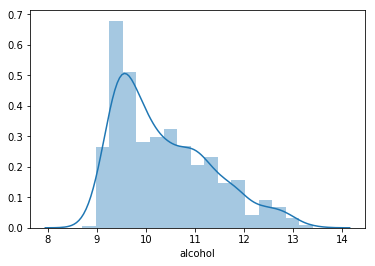

In [203]:
#Univariate analysis
sns.distplot(wine_df['alcohol'])

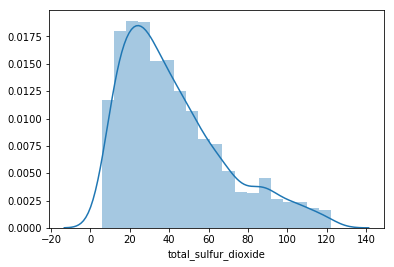

In [204]:
sns.distplot(wine_df['total_sulfur_dioxide'])

Observations:

    Both Alcohol and Sulphur dioxide parameter are nearly normally distributed but right skewed.
    Univariate analysis usually helps in identifying if the if the data is normally distributed or skewed or is bimodal etc.
    

In [205]:
#we can use skewness and kurtosis to figure out tail info
wine_df.kurtosis(numeric_only=True)

fixed_acidity           0.044337
volatile_acidity       -0.233225
citric_acid            -0.920661
residual_sugar          0.421656
chlorides               0.200325
free_sulfur_dioxide     0.085052
total_sulfur_dioxide    0.331849
density                -0.006243
pH                     -0.206224
sulphates               0.028120
alcohol                -0.193486
quality                 3.281597
dtype: float64

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


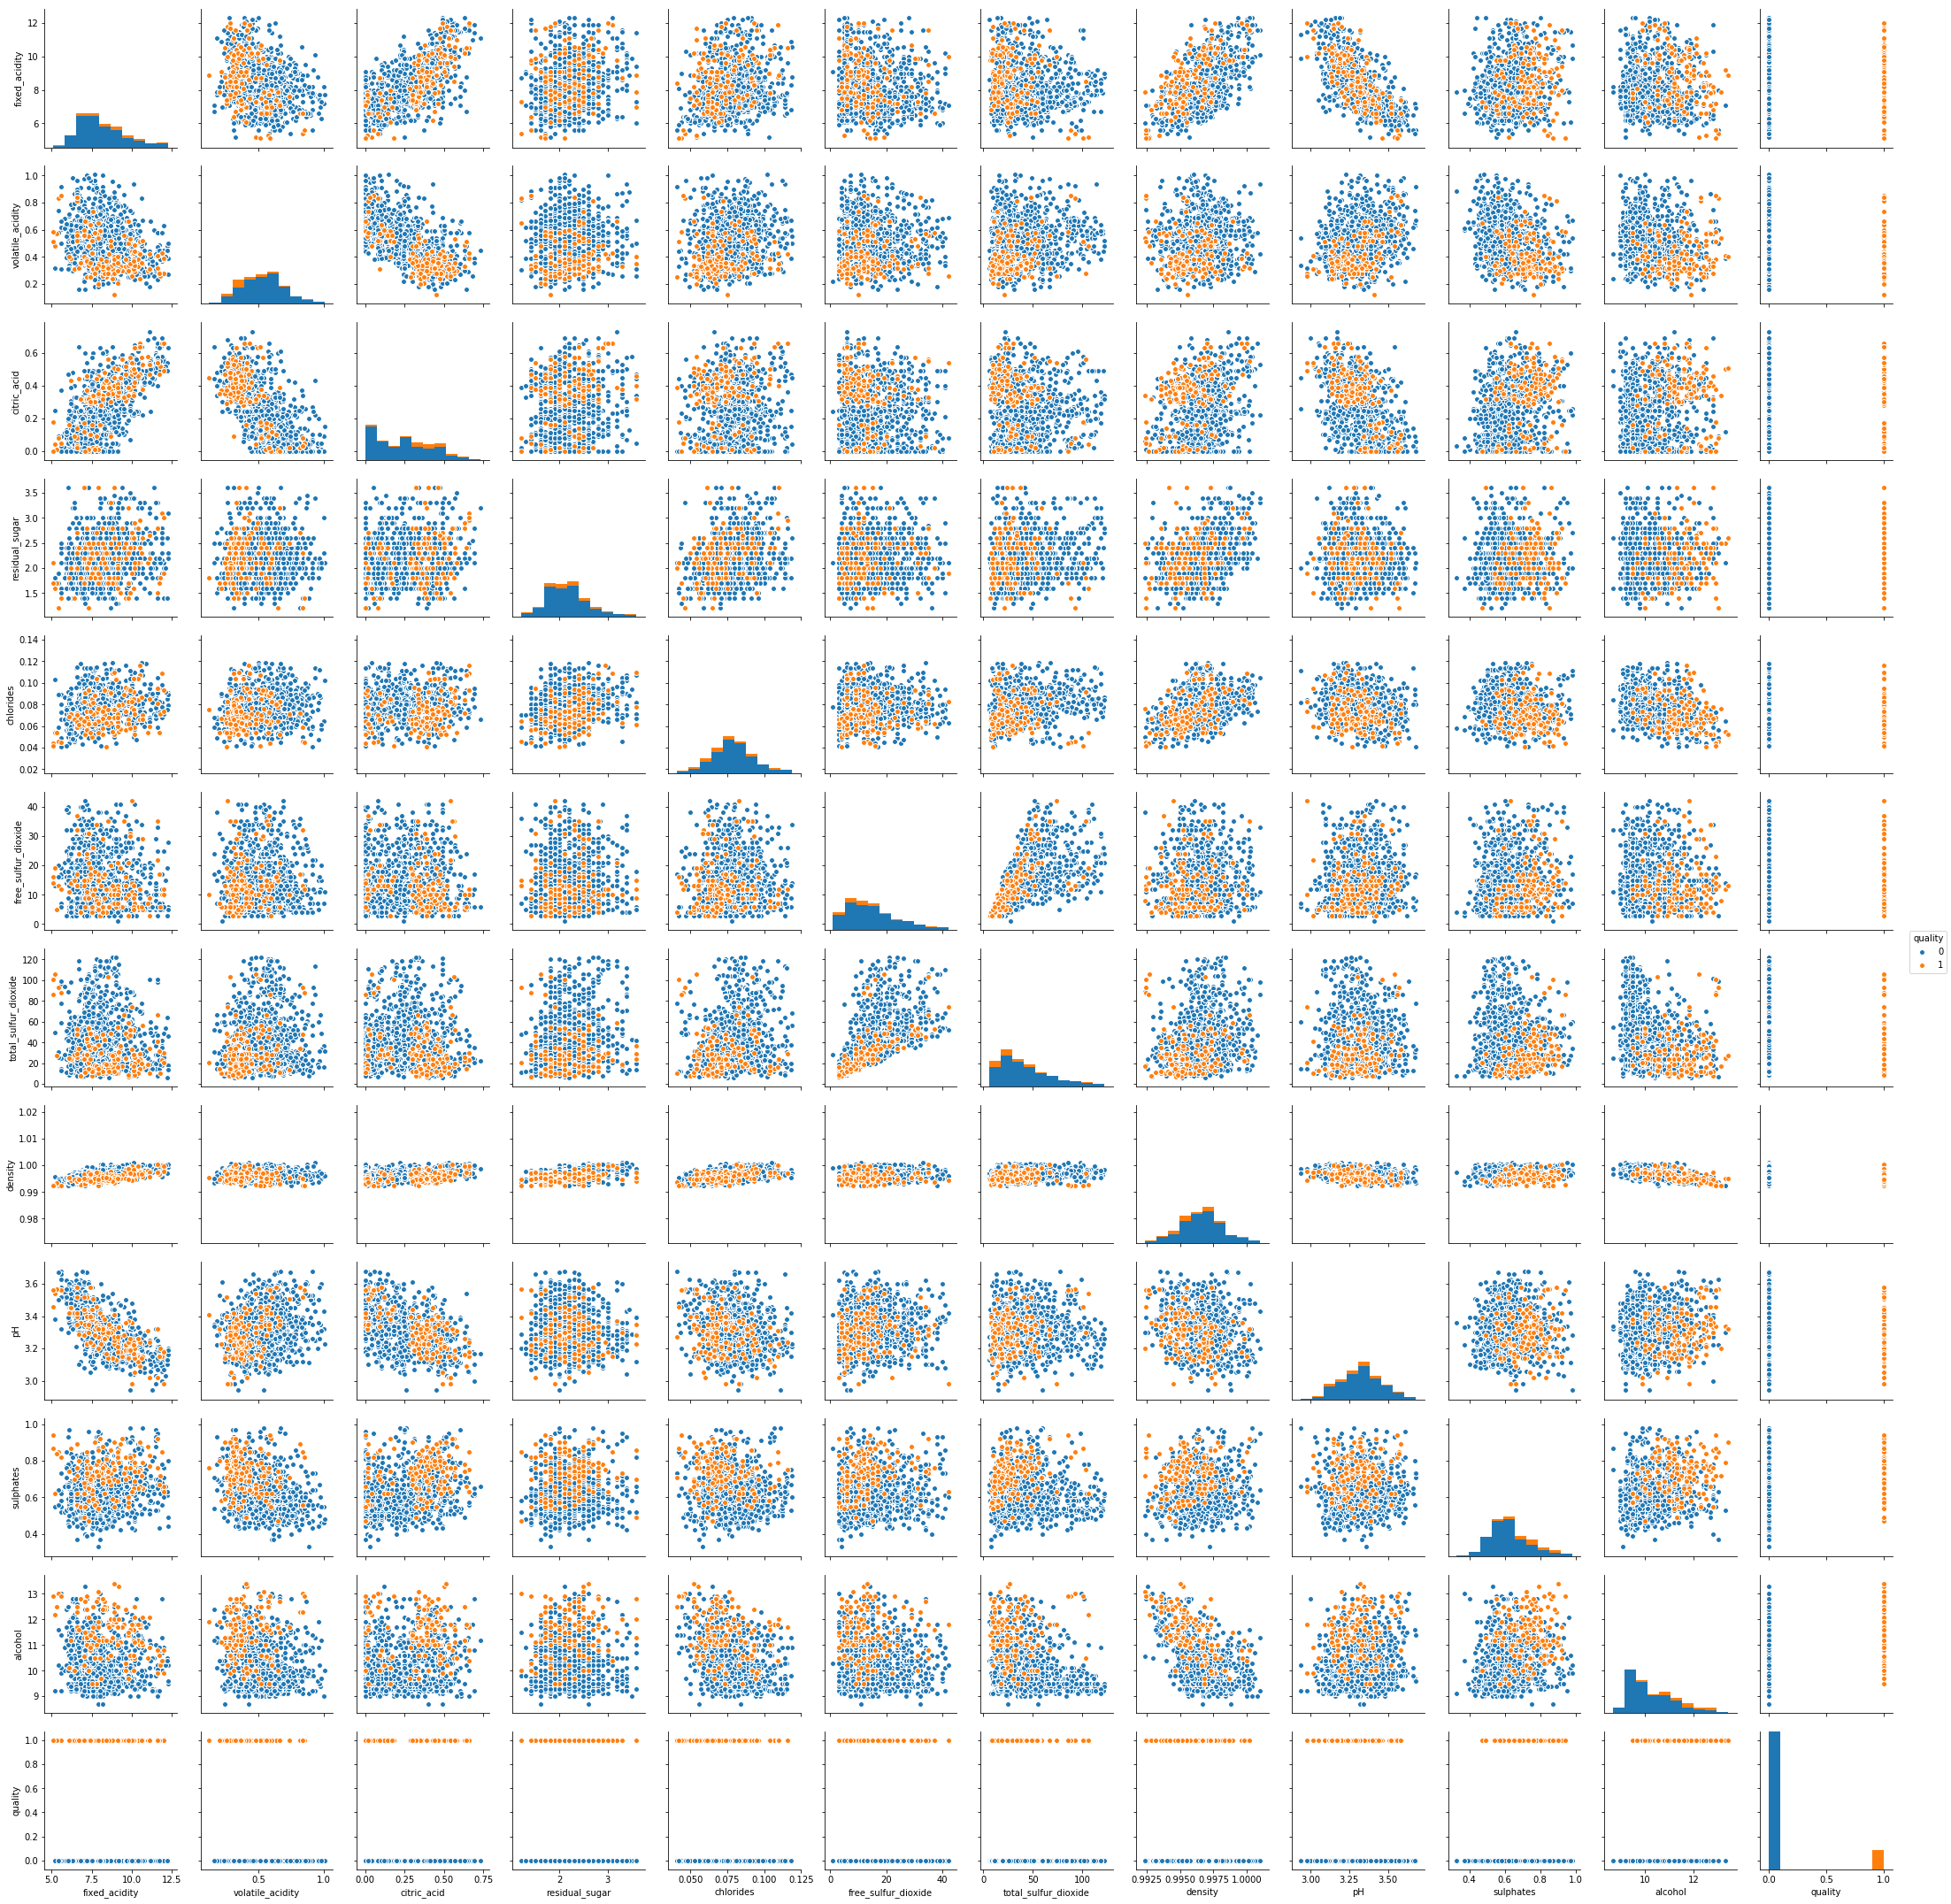

In [206]:
sns.pairplot(wine_df, hue= 'quality')

# Q7 Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [207]:
X = wine_df.drop('quality', axis=1) 
Y = wine_df.quality

test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for repeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [208]:
#Validation set creation for avoiding bias due to test data.

X_train, X_val, Y_train, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=7)


# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [209]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q9 Print the accuracy of the model & print the confusion matrix 

In [210]:
print(dt_model.score(X_train, Y_train))
print(dt_model.score(X_val , Y_val))

#confusion matrix
Y_predict = dt_model.predict(X_val)
print(metrics.confusion_matrix(Y_val, Y_predict))


1.0
0.7722222222222223
[[130  30]
 [ 11   9]]


feature importance

In [211]:
index_name = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']
pd.DataFrame(dt_model.feature_importances_, index=index_name)

,0
fixed_acidity,0.040172
volatile_acidity,0.176955
citric_acid,0.000000
residual_sugar,0.128038
chlorides,0.127273
free_sulfur_dioxide,0.101462
total_sulfur_dioxide,0.027264
density,0.043888
pH,0.030327
sulphates,0.041030


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [212]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [213]:
print(dt_model.score(X_train, Y_train))
print(dt_model.score(X_val , Y_val))

#confusion matrix
Y_predict = dt_model.predict(X_val)
print(metrics.confusion_matrix(Y_val, Y_predict))

0.9106145251396648
0.8555555555555555
[[144  16]
 [ 10  10]]


**This shows that there is an increase in accuracy when we regularize the decision tree. 
As the depth increases, the validation data gives lesser accuracy, because it tends towards overfitting model.**

In [214]:
#Now we can use the test data to check the accuracy at max_depth = 3 cause 3 gives slightly better accuracy.

print(dt_model.score(X_train, Y_train))
print(dt_model.score(X_test , Y_test))
#confusion matrix
Y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(Y_test, Y_predict))

0.9106145251396648
0.883008356545961
[[288  20]
 [ 22  29]]


**This shows that we are able to get 91.6 percent accuracy on our test data.**

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [215]:

rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, Y_train)


In [216]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , Y_test))
print(metrics.confusion_matrix(Y_test, y_predict))

0.9415041782729805
[[300   8]
 [ 13  38]]


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [223]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, Y_train)

In [218]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , Y_test))

print(metrics.confusion_matrix(Y_test, y_predict))

0.924791086350975
[[292  16]
 [ 11  40]]


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [219]:
from sklearn.ensemble import BaggingClassifier


bgcl = BaggingClassifier(n_estimators=50)

bgcl = bgcl.fit(X_train, Y_train)


In [220]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , Y_test))

print(metrics.confusion_matrix(Y_test, y_predict))

0.9498607242339833
[[300   8]
 [ 10  41]]


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [221]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50)

bgcl = bgcl.fit(X_train, Y_train)


In [222]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , Y_test))

print(metrics.confusion_matrix(Y_test, y_predict))

0.9387186629526463
[[298  10]
 [ 12  39]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.